<a href="https://colab.research.google.com/github/zoyahaider22/Diabetes_Prediction_Model/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [183]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# **Data Collection and Analysis**

PIMA Diabetes Dataset

In [184]:
# loading the diabetes datasets to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [185]:
pd.read_csv?

In [186]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [187]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [188]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [189]:
# Replace zeroes with NaN in certain columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_dataset[cols_with_zero] = diabetes_dataset[cols_with_zero].replace(0, np.nan)

In [190]:
# Fill missing values with column means
diabetes_dataset.fillna(diabetes_dataset.mean(), inplace=True)

In [191]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 ---> Non-Diabetic

1 ---> Diabetic

In [192]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


In [193]:
# separating the data and Labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [194]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [195]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# **Data Visualization**

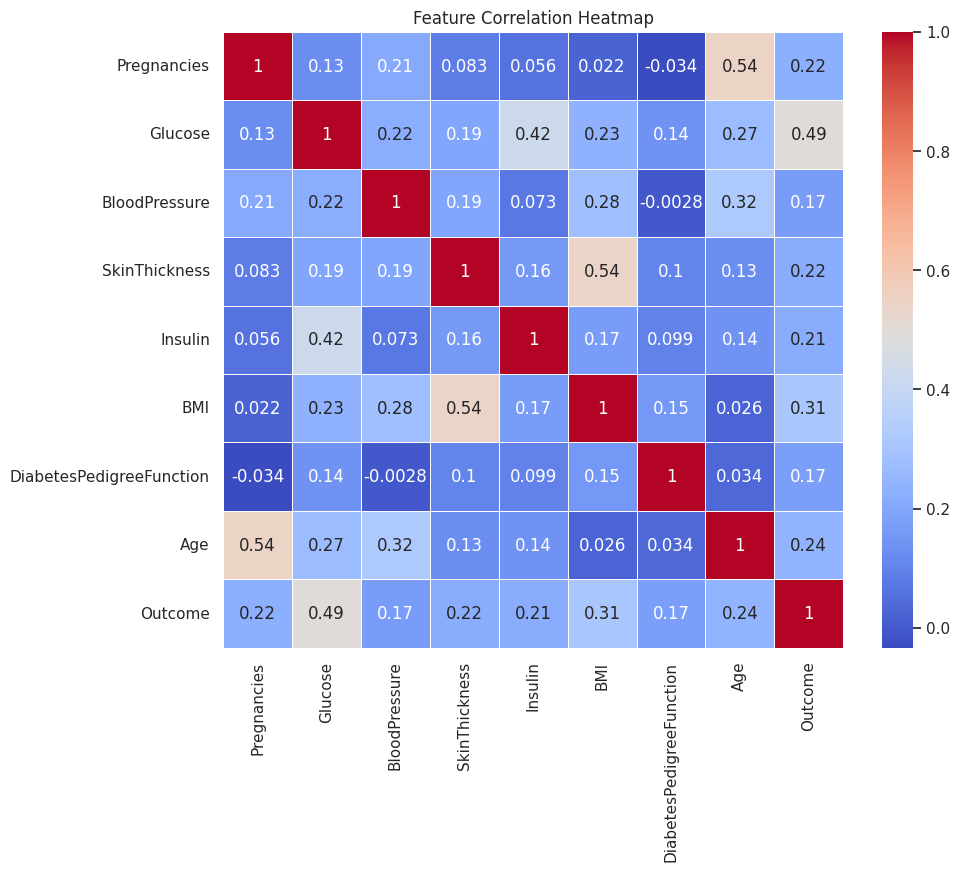

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")  # or "whitegrid", "dark", "white", "ticks"
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


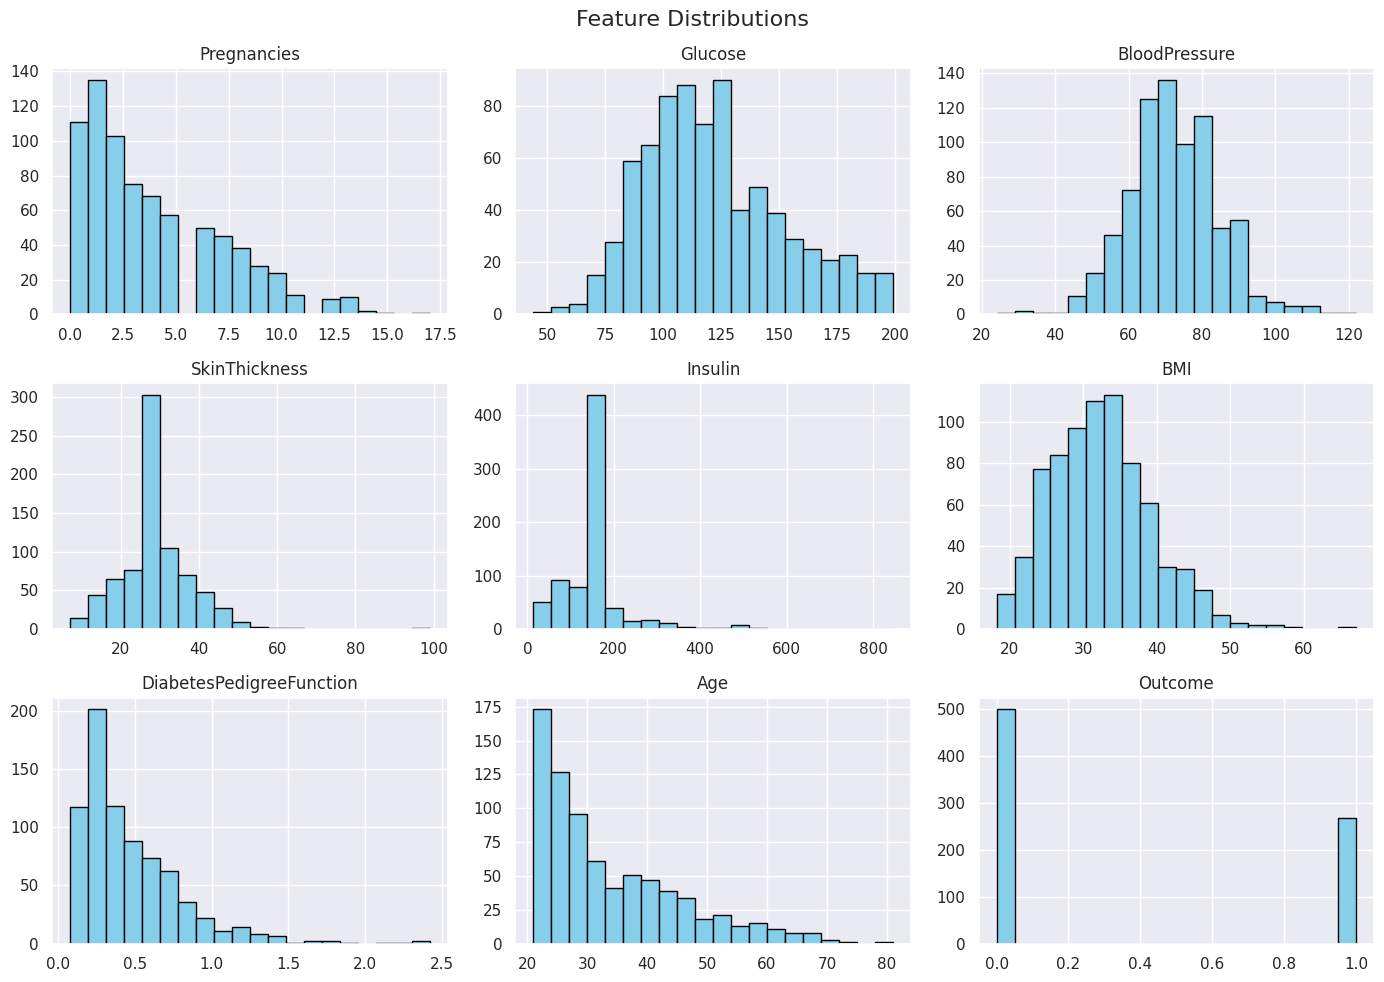

In [197]:
import seaborn as sns
sns.set_theme(style="darkgrid")  # or "whitegrid", "dark", "white", "ticks"

diabetes_dataset.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


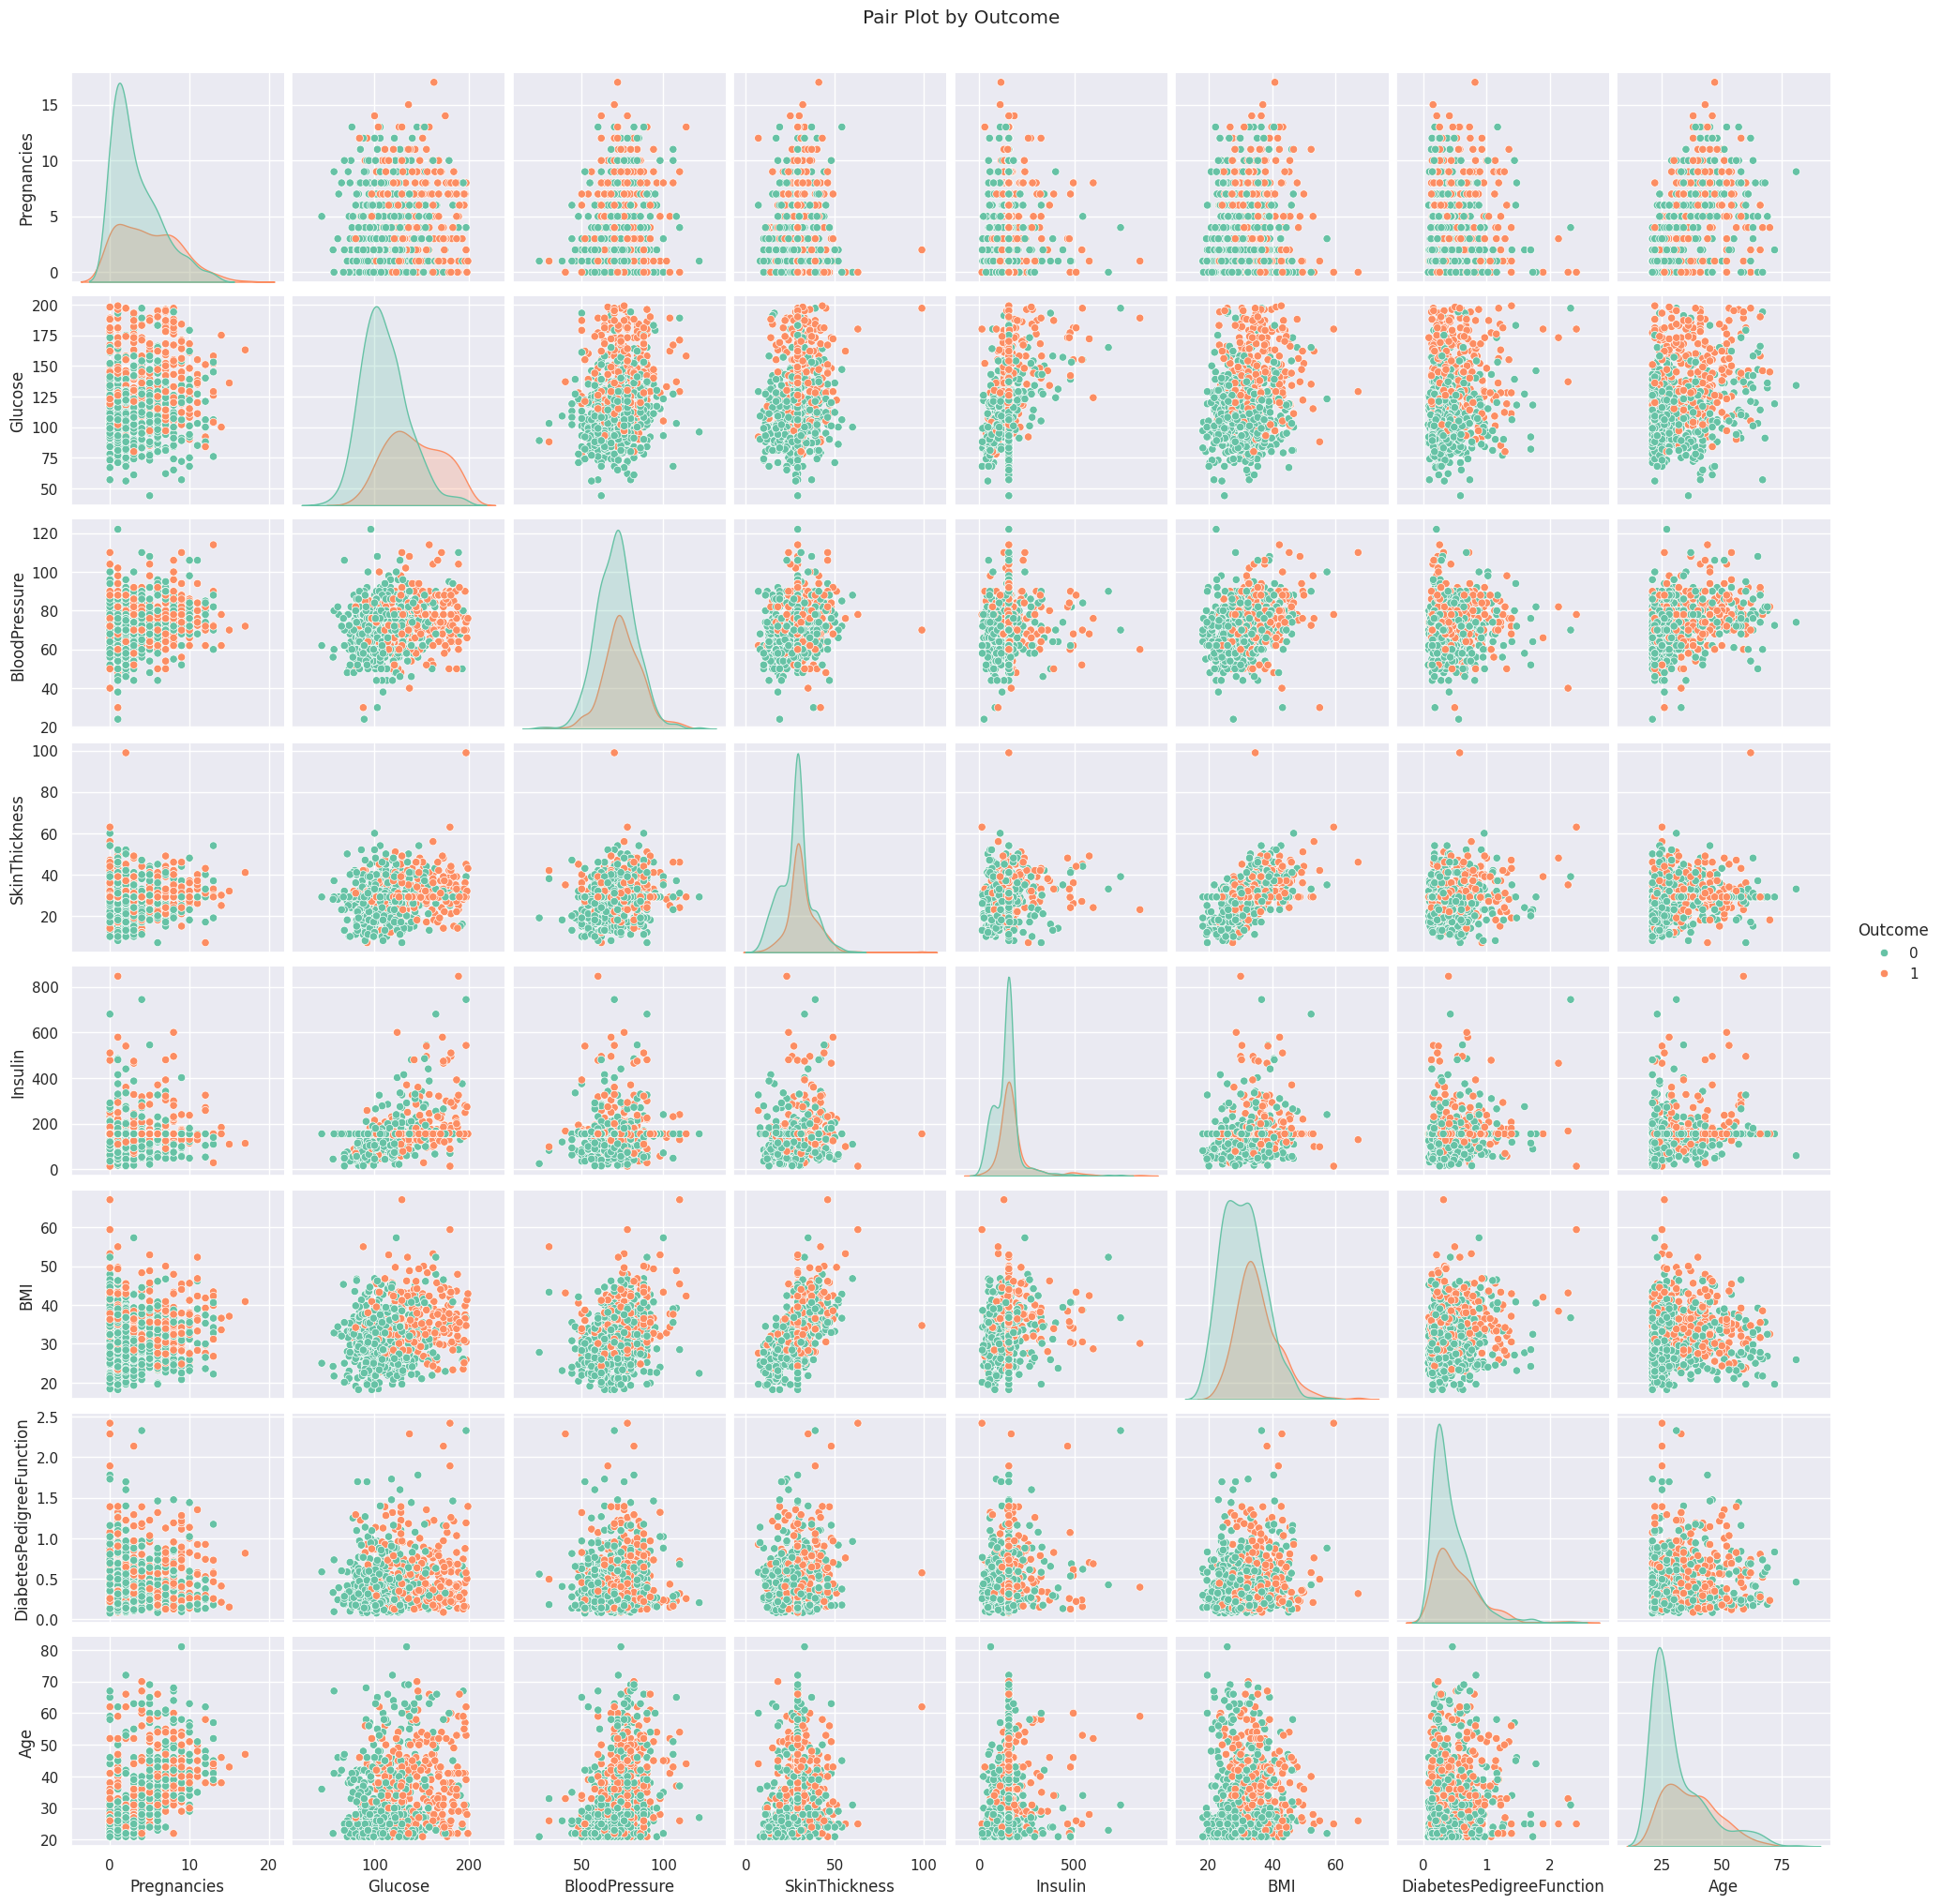

In [198]:
sns.set_theme(style="darkgrid")  # or "whitegrid", "dark", "white", "ticks"
sns.pairplot(diabetes_dataset, hue='Outcome', palette='Set2')
plt.suptitle("Pair Plot by Outcome", y=1.02)
plt.show()


# **Data Standardization**

In [199]:
scaler = StandardScaler()

In [200]:
X_scaled = scaler.fit_transform(X)

In [201]:
print(X_scaled)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [202]:
X = X_scaled
Y = diabetes_dataset['Outcome']

In [203]:
print(X)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [204]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# **Train Test Split**

In [205]:
# 3. Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=42)

In [206]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# **SMOTEENN: Synthetic Minority Over-sampling Technique + Edited Nearest Neighbours**

In [207]:
from imblearn.combine import SMOTEENN
# 4. Handle Imbalance using SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_bal, Y_train_bal = smote_enn.fit_resample(X_train, Y_train)

print("Before SMOTE:", Y_train.value_counts())
print("After SMOTE:", Y_train_bal.value_counts())


Before SMOTE: Outcome
0    400
1    214
Name: count, dtype: int64
After SMOTE: Outcome
1    264
0    213
Name: count, dtype: int64


# **Training The Model**

In [208]:
# ----------- MODEL 1: SVM -----------
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Try both linear and RBF kernel
    'gamma': ['scale', 'auto']     # Kernel coefficient for ‘rbf’
}

# GridSearchCV for hyperparameter tuning
grid_search_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit on training data
grid_search_svm.fit(X_train_bal, Y_train_bal)

# Best parameters and model
best_svm_model = grid_search_svm.best_estimator_
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Predict on test data
svm_preds = best_svm_model.predict(X_test)

# Evaluation
print("SVM Test Accuracy:", accuracy_score(Y_test, svm_preds))
print(" SVM Confusion Matrix:\n", confusion_matrix(Y_test, svm_preds))
print(" SVM Classification Report:\n", classification_report(Y_test, svm_preds))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Test Accuracy: 0.7207792207792207
 SVM Confusion Matrix:
 [[70 30]
 [13 41]]
 SVM Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.77       100
           1       0.58      0.76      0.66        54

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



In [181]:
# ----------- MODEL 2: Random Forest -----------
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit to the balanced training data
grid_search_rf.fit(X_train_bal, Y_train_bal)

# Get the best model from GridSearch
best_rf_model = grid_search_rf.best_estimator_
print(" Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Predict using the best model
rf_preds = best_rf_model.predict(X_test)

# Evaluation
print(" Random Forest Test Accuracy:", accuracy_score(Y_test, rf_preds))
print(" Random Forest Confusion Matrix:\n", confusion_matrix(Y_test, rf_preds))
print(" Random Forest Classification Report:\n", classification_report(Y_test, rf_preds))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
 Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
 Random Forest Test Accuracy: 0.7467532467532467
 Random Forest Confusion Matrix:
 [[69 31]
 [ 8 46]]
 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       100
           1       0.60      0.85      0.70        54

    accuracy                           0.75       154
   macro avg       0.75      0.77      0.74       154
weighted avg       0.79      0.75      0.75       154



In [211]:
# ----------- MODEL 3: XGBoost with Hyperparameter Tuning -----------
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [212]:
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_bal, Y_train_bal)

best_xgb = grid_search.best_estimator_

xgb_preds = best_xgb.predict(X_test)
xgb_accuracy_score = accuracy_score
print("XGBoost Best Params:", grid_search.best_params_)
print("XGBoost Test Accuracy:", accuracy_score(Y_test, xgb_preds))
print("XGBoost Confusion Matrix:\n", confusion_matrix(Y_test, xgb_preds))
print("XGBoost Classification Report:\n", classification_report(Y_test, xgb_preds))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
XGBoost Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
XGBoost Test Accuracy: 0.7272727272727273
XGBoost Confusion Matrix:
 [[67 33]
 [ 9 45]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76       100
           1       0.58      0.83      0.68        54

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.72       154
weighted avg       0.77      0.73      0.73       154



# **Model Evaluation**

Accuracy Score

In [213]:
# accuracy on the training data
X_train_prediction = best_rf_model.predict(X_train_bal)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train_bal)

In [214]:
print('Accuracy of the training data : ', training_data_accuracy)

Accuracy of the training data :  0.9958071278825996


In [215]:
# accuracy on the test data
X_test_prediction = best_rf_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [216]:
print('Accuracy of the test data : ', test_data_accuracy)

Accuracy of the test data :  0.7467532467532467


In [217]:
# Make predictions on the test data
test_preds = best_rf_model.predict(X_test)

In [218]:
# Detailed evaluation
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, test_preds))
print("\nClassification Report:\n", classification_report(Y_test, test_preds))


Confusion Matrix:
 [[69 31]
 [ 8 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       100
           1       0.60      0.85      0.70        54

    accuracy                           0.75       154
   macro avg       0.75      0.77      0.74       154
weighted avg       0.79      0.75      0.75       154



In [219]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_bal, Y_train_bal)

# Evaluate
train_preds = xgb_model.predict(X_train_bal)
test_preds = xgb_model.predict(X_test)

train_acc = accuracy_score(Y_train_bal, train_preds)
test_acc = accuracy_score(Y_test, test_preds)

print("XGBoost Training Accuracy:", train_acc)
print("XGBoost Test Accuracy:", test_acc)


XGBoost Training Accuracy: 1.0
XGBoost Test Accuracy: 0.6948051948051948


In [220]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [221]:
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_bal, Y_train_bal)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [222]:
print("Best Parameters:\n", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Predict with best estimator
best_model = grid_search.best_estimator_
test_preds = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(Y_test, test_preds))
print("Confusion Matrix:\n", confusion_matrix(Y_test, test_preds))
print("Classification Report:\n", classification_report(Y_test, test_preds))


Best Parameters:
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Score: 0.9434210526315789
Test Accuracy: 0.7272727272727273
Confusion Matrix:
 [[67 33]
 [ 9 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76       100
           1       0.58      0.83      0.68        54

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.72       154
weighted avg       0.77      0.73      0.73       154



In [223]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(Y_test, test_preds))
print("Classification Report:\n", classification_report(Y_test, test_preds))


Confusion Matrix:
 [[67 33]
 [ 9 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76       100
           1       0.58      0.83      0.68        54

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.72       154
weighted avg       0.77      0.73      0.73       154



In [224]:
import joblib  # For saving the best model

 # Step 1: Train all three models
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train)

# Step 2: Make predictions
svm_preds = svm_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Step 3: Calculate accuracies
svm_accuracy = accuracy_score(Y_test, svm_preds)
rf_accuracy = accuracy_score(Y_test, rf_preds)
xgb_accuracy = accuracy_score(Y_test, xgb_preds)

# Step 4: Store in dictionary
model_accuracies = {
    "SVM (Linear Kernel)": svm_accuracy,
    "Random Forest": rf_accuracy,
    "XGBoost": xgb_accuracy
}

# Step 5: Identify best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

# Step 6: Get best model object
if best_model_name == "SVM (Linear Kernel)":
    best_model = svm_model
elif best_model_name == "Random Forest":
    best_model = rf_model
else:
    best_model = xgb_model

# Step 7: Output results
print(f" Best Model: {best_model_name}")
print(f" Accuracy: {best_model_accuracy:.4f}")

# Step 8: Save best model
joblib.dump(best_model, 'best_model.pkl')
print(" Best model saved as 'best_model.pkl'")


 Best Model: Random Forest
 Accuracy: 0.7857
 Best model saved as 'best_model.pkl'


In [225]:
# Save best model and scaler
joblib.dump(best_model, 'best_diabetes_model.pkl')
joblib.dump(scaler, 'diabetes_scaler.pkl')

['diabetes_scaler.pkl']

# **Making A Predictive System**

In [226]:
def predict_diabetes(input_data):
    # Load model and scaler
    model = joblib.load('best_diabetes_model.pkl')
    scaler = joblib.load('diabetes_scaler.pkl')

    # Prepare input
    input_array = np.asarray(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    # Predict
    prediction = model.predict(input_scaled)
    return "Diabetic" if prediction[0] == 1 else "Not Diabetic"

# Example prediction
example = [2,197,70,45,543,30.5,0.158,53]  # Example input
print("Prediction:", predict_diabetes(example))


Prediction: Diabetic
